In [1]:
from py_wake.examples.data.hornsrev1 import Hornsrev1Site, V80, wt_x, wt_y, wt16_x, wt16_y
from py_wake import NOJ

#here we import the turbine, site and wake deficit model to use.
windTurbines = V80()
site = Hornsrev1Site()
noj = NOJ(site,windTurbines)

/home/andrew/repos/Uni Work/WindFarm2/.venv/lib64/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
simulationResult = noj(wt16_x,wt16_y)

In [3]:
simulationResult.aep()

<xarray.DataArray 'AEP [GWh]' (wt: 16, wd: 360, ws: 23)> Size: 1MB
array([[[0.00000000e+00, 4.99347385e-05, 1.42930180e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 4.99347385e-05, 1.42930180e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 4.99347385e-05, 1.42930180e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        ...,
        [0.00000000e+00, 4.99347385e-05, 1.42930180e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 4.99347385e-05, 1.42930180e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 4.99347385e-05, 1.42930180e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07]],

       [[0.00000000e+00, 3.21704038e-05, 1.07631358e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 3.50325965e-05, 1.13318710e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 3.81343279e-05, 1.19482041e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
...
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 3.70626513e-05, 9.95068465e-05, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 3.73276423e-05, 1.00421384e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07]],

       [[0.00000000e+00, 3.69047609e-05, 1.05287023e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 3.86957286e-05, 1.12417512e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 4.06849605e-05, 1.19260253e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        ...,
        [0.00000000e+00, 3.54284013e-05, 9.86539322e-05, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 3.54109110e-05, 9.85789848e-05, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 3.55351507e-05, 9.93005262e-05, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07]]],
      shape=(16, 360, 23))
Coordinates:
  * wt       (wt) int64 128B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
    type     (wt) int64 128B 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  * wd       (wd) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * ws       (ws) int64 184B 3 4 5 6 7 8 9 10 11 ... 17 18 19 20 21 22 23 24 25
Attributes:
    Description:  Annual energy production [GWh]

In [4]:
print ("Total AEP: %f GWh"%simulationResult.aep().sum())

Total AEP: 143.074909 GWh


Text(0.5, 1.0, 'AEP vs wind direction')

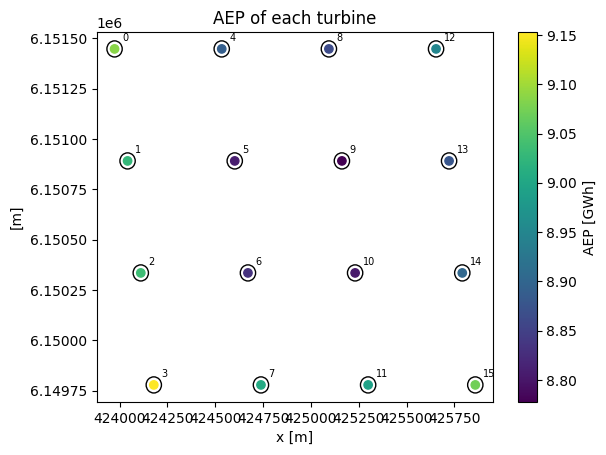

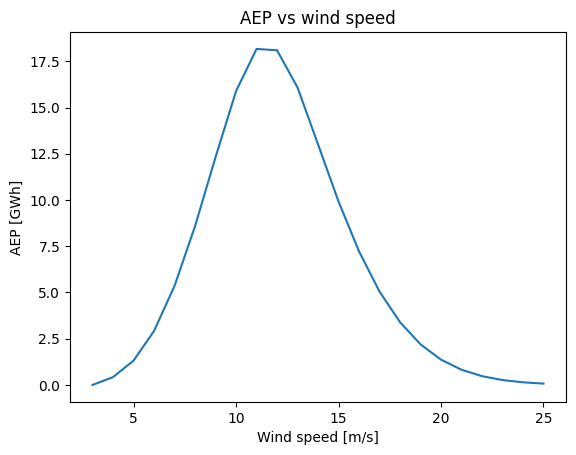

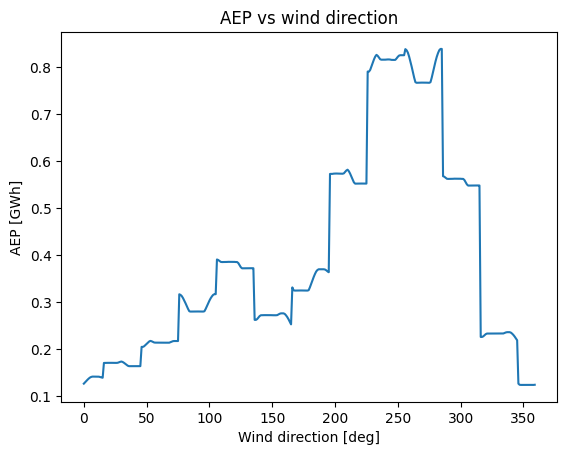

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
aep = simulationResult.aep()
windTurbines.plot(wt16_x,wt16_y)
c =plt.scatter(wt16_x, wt16_y, c=aep.sum(['wd','ws']))
plt.colorbar(c, label='AEP [GWh]')
plt.title('AEP of each turbine')
plt.xlabel('x [m]')
plt.ylabel('[m]')

plt.figure()
aep.sum(['wt','wd']).plot()
plt.xlabel("Wind speed [m/s]")
plt.ylabel("AEP [GWh]")
plt.title('AEP vs wind speed')

plt.figure()
aep.sum(['wt','ws']).plot()
plt.xlabel("Wind direction [deg]")
plt.ylabel("AEP [GWh]")
plt.title('AEP vs wind direction')

Text(0.5, 1.0, 'Wake map for 10 m/s and 270 deg')

<Figure size 640x480 with 0 Axes>

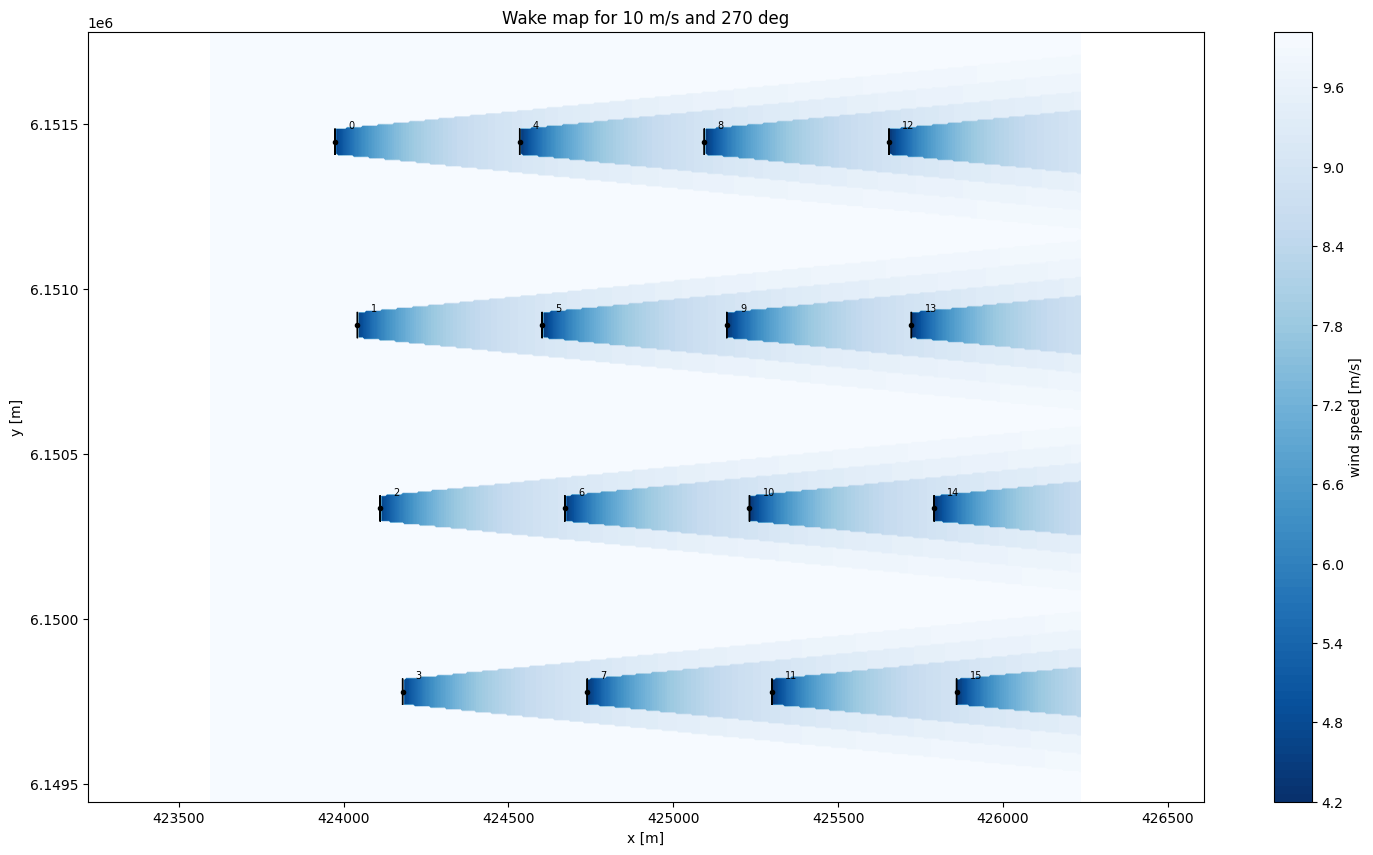

In [6]:
wind_speed = 10
wind_direction = 270

plt.figure()
flow_map = simulationResult.flow_map(ws=wind_speed, wd=wind_direction)
plt.figure(figsize=(18,10))
flow_map.plot_wake_map()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Wake map for' + f' {wind_speed} m/s and {wind_direction} deg')